In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.utils import to_categorical

In [ ]:
new_data = pd.read_csv(r'/content/sample_data/text.csv')
new_data

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


def stem_text(text):
    ps = PorterStemmer()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return  text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(data):
    data = data.apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))
    data = data.apply(lambda x : x.lower())

    data = data.apply(lambda x : lemmatize_text(x))
    data = data.apply(lambda x : stem_text(x))

    return data



new_data['text'] = clean(new_data['text'])
new_data['text']

0                          feel realli helpless heavi heart
1         ive enjoy abl slouch relax unwind frankli need...
2                      gave internship dmrg feel distraught
3                                       dont know feel lost
4         kindergarten teacher thoroughli weari job take...
                                ...                        
416804    feel like tell horni devil find site suit sort...
416805    began realiz wa feel agit restless would thoug...
416806      feel curiou previou earli dawn time seek troubl
416807    feel becuas tyran natur govern el salvador sav...
416808    think spent time investig surround thing start...
Name: text, Length: 416809, dtype: object

In [ ]:
sad = []
joy = []
love = []
angry = []
fear = []
surprise = []

for i in range(0, 416809  ):
    if new_data['label'][i] == 0:
        sad.append(new_data['text'][i])
    elif new_data['label'][i] == 1:
        joy.append(new_data['text'][i])
    elif new_data['label'][i] == 2:
        love.append(new_data['text'][i])
    elif new_data['label'][i] == 3:
        angry.append(new_data['text'][i])
    elif new_data['label'][i] == 4:
        fear.append(new_data['text'][i])
    elif new_data['label'][i] == 5:
        surprise.append(new_data['text'][i])


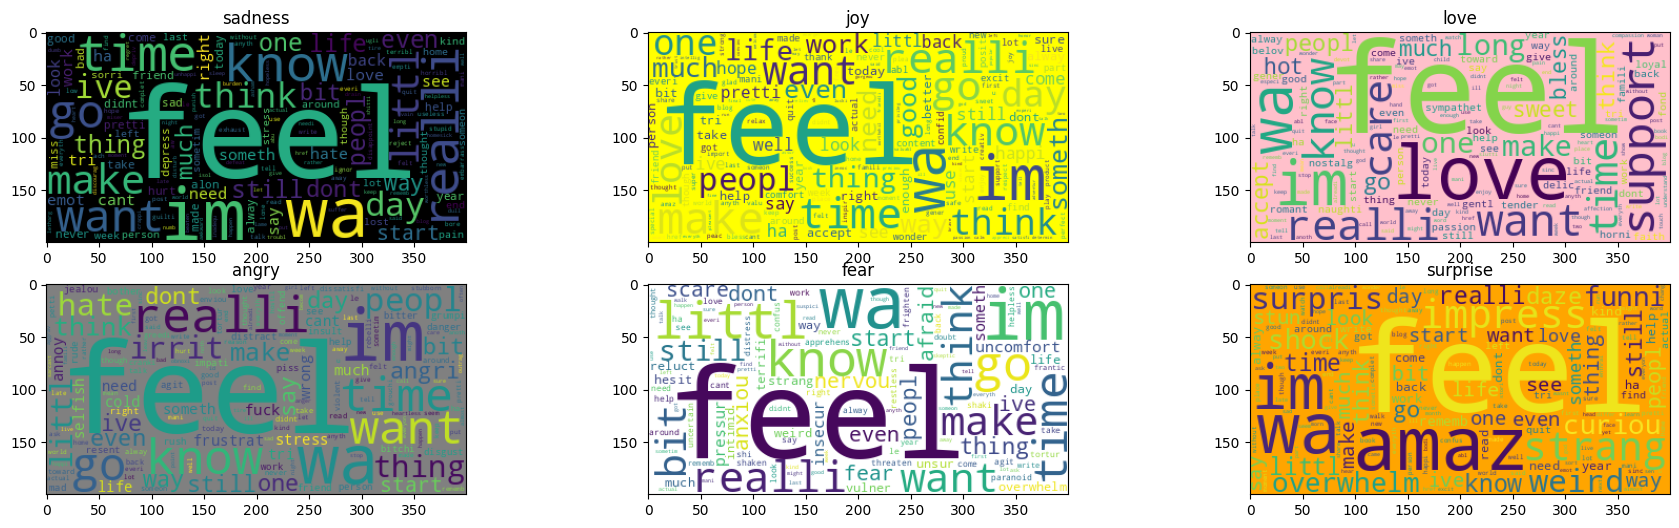

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axc = plt.subplots(2, 3, figsize=(22, 6)) # num of rows, num of cols
sad_wordcloud = WordCloud(collocations=False, background_color='black').generate(' '.join(sad))
joy_wordcloud = WordCloud(collocations=False, background_color='yellow').generate(' '.join(joy))
love_wordcloud = WordCloud(collocations=False, background_color='pink').generate(' '.join(love))
angry_wordcloud = WordCloud(collocations=False, background_color='gray').generate(' '.join(angry))
fear_wordcloud = WordCloud(collocations=False, background_color='white').generate(' '.join(fear))
sur_wordcloud = WordCloud(collocations=False, background_color='orange').generate(' '.join(surprise))

axc[0][0].imshow(sad_wordcloud)
axc[0][0].set_title('sadness')

axc[0][1].imshow(joy_wordcloud)
axc[0][1].set_title('joy')

axc[0][2].imshow(love_wordcloud)
axc[0][2].set_title('love')

axc[1][0].imshow(angry_wordcloud)
axc[1][0].set_title('angry')

axc[1][1].imshow(fear_wordcloud)
axc[1][1].set_title('fear')

axc[1][2].imshow(sur_wordcloud)
axc[1][2].set_title('surprise')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from keras.utils import to_categorical

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_data['text'])

word_index = tokenizer.word_index
word_index

{'feel': 1,
 'like': 2,
 'im': 3,
 'wa': 4,
 'know': 5,
 'get': 6,
 'realli': 7,
 'time': 8,
 'go': 9,
 'make': 10,
 'want': 11,
 'love': 12,
 'think': 13,
 'littl': 14,
 'peopl': 15,
 'would': 16,
 'thing': 17,
 'one': 18,
 'day': 19,
 'still': 20,
 'even': 21,
 'life': 22,
 'ive': 23,
 'much': 24,
 'way': 25,
 'someth': 26,
 'bit': 27,
 'need': 28,
 'dont': 29,
 'start': 30,
 'say': 31,
 'work': 32,
 'could': 33,
 'see': 34,
 'look': 35,
 'ha': 36,
 'tri': 37,
 'back': 38,
 'good': 39,
 'alway': 40,
 'help': 41,
 'pretti': 42,
 'right': 43,
 'come': 44,
 'also': 45,
 'year': 46,
 'friend': 47,
 'take': 48,
 'use': 49,
 'cant': 50,
 'person': 51,
 'today': 52,
 'never': 53,
 'hate': 54,
 'around': 55,
 'didnt': 56,
 'though': 57,
 'well': 58,
 'happi': 59,
 'made': 60,
 'thought': 61,
 'find': 62,
 'hope': 63,
 'got': 64,
 'lot': 65,
 'someon': 66,
 'write': 67,
 'quit': 68,
 'long': 69,
 'week': 70,
 'everi': 71,
 'mani': 72,
 'le': 73,
 'read': 74,
 'sure': 75,
 'felt': 76,
 'give':

In [ ]:
def preprocess_data(data):
    new_data = []
    for index, row in data.iterrows():
        test_split = row['text'].split()
        #stemmed_words = [ps.stem(word) for word in test_split]
        token_list= tokenizer.texts_to_sequences([test_split])[0]
        new_data.append(token_list)
    return new_data

In [ ]:
new_train_data = preprocess_data(new_data)
print(new_data['text'][100])
print(new_train_data[100])

get feel gp amp fab alway
[6, 1, 4223, 273, 1195, 40]


In [ ]:
# padding ......
length_of_longest_sentence = len(max(new_train_data, key=len))
print(length_of_longest_sentence)
print(max(new_train_data, key=len))


for i in range(len(new_train_data)):
    for j in range(length_of_longest_sentence-len(new_train_data[i])):
        new_train_data[i].append(0)

80
[19, 38, 4, 293, 1290, 1290, 181, 6, 1290, 899, 2072, 825, 4127, 723, 1290, 1530, 64, 1290, 108, 4127, 1144, 976, 1265, 1290, 1530, 61, 1626, 11, 6, 235, 698, 1290, 2114, 158, 133, 3058, 25, 4127, 994, 339, 1144, 727, 723, 239, 3672, 4127, 1144, 33, 176, 2114, 792, 386, 60, 1, 169, 82, 3218, 2145, 4127, 1144, 6, 101, 677, 225, 1544, 4127, 2441, 1626, 85, 1530, 111, 8, 1123, 1290, 33, 20, 256, 3294, 76, 369]


In [ ]:
train_X = np.array(new_train_data)
train_X.shape

(416809, 80)

In [ ]:
train_y = np.array(new_data['label'])
train_y.shape

(416809,)

In [ ]:
train_y_encoded = to_categorical(train_y, num_classes=6)
train_y_encoded.shape

(416809, 6)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_train_data, train_y_encoded, test_size=0.2 ,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2 ,random_state=42)
y_train.shape

(266757, 6)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
x_train.shape

(266757, 80)

In [ ]:
input_Size = np.max(new_train_data) + 1
input_Size

51653

In [ ]:
from keras import regularizers

model = Sequential()
model.add(Embedding(input_Size, 50, input_length=80)) # input_size: length, input_length: width


model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))



adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_val, y_val))
print(model)

Epoch 1/5
8337/8337 [==============================] - 3649s 436ms/step - loss: 0.2269 - accuracy: 0.8985 - val_loss: 0.1528 - val_accuracy: 0.9228
Epoch 2/5
8337/8337 [==============================] - 3422s 410ms/step - loss: 0.1572 - accuracy: 0.9192 - val_loss: 0.1374 - val_accuracy: 0.9246
Epoch 3/5
8337/8337 [==============================] - 3424s 411ms/step - loss: 0.1479 - accuracy: 0.9226 - val_loss: 0.1345 - val_accuracy: 0.9266
Epoch 4/5
8337/8337 [==============================] - 3409s 409ms/step - loss: 0.1432 - accuracy: 0.9240 - val_loss: 0.1330 - val_accuracy: 0.9265
Epoch 5/5
8337/8337 [==============================] - 3429s 411ms/step - loss: 0.1390 - accuracy: 0.9258 - val_loss: 0.1326 - val_accuracy: 0.9270


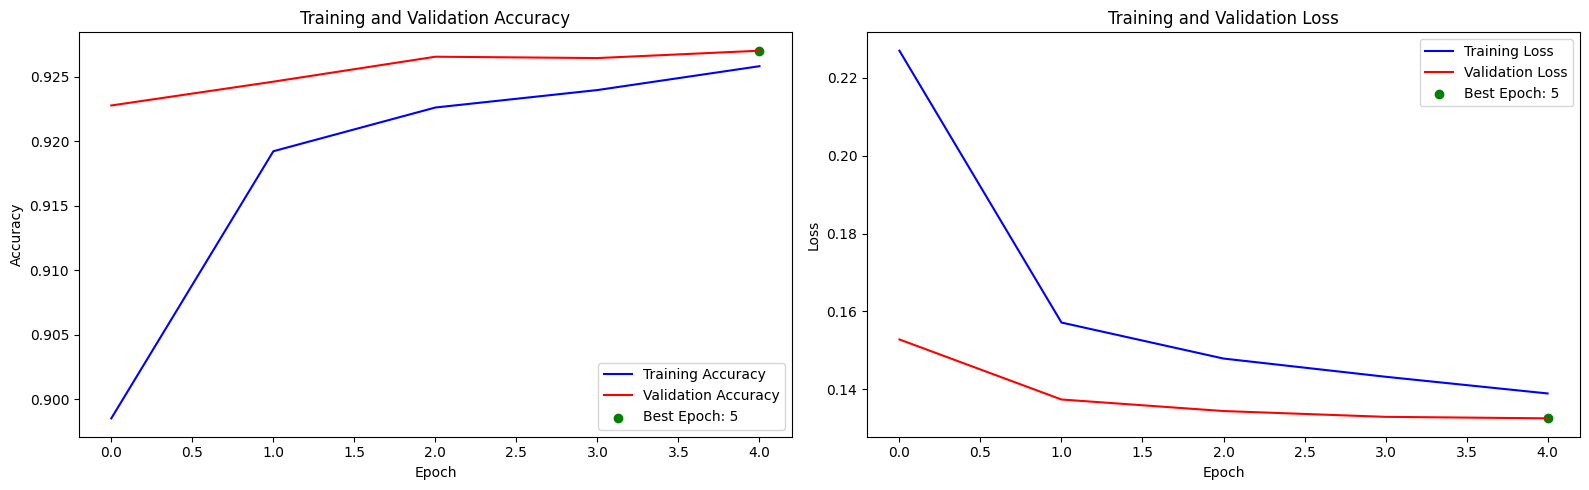

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.save('my_model.h5')